This notebook analyzes data from the 2012–13 European football (soccer) professional leagues on red cards, to try to find evidence whether referees were more likely to give red cards to players with darker skin.
Data about the players’ ages, heights, weights, position, skintone rating, and more are included.

In soccer, yellow cards are issued for fouls.  Two yellow cards become a red card.  Red cards mean the player has to leave the game.

IAT represents implicit bias score for the referee's country.  Exp represents explicit bias score for the referee's country.  Rater1 and rater2 represent two people's ratings of the player's skin tone.
Dataset rows represent player-referee dyads.

I have the hypotheses that player position, country, and skin tone might be correlated to yellow, yellow-red, and red cards.

In [1]:
#Import data
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
soccerdata=pd.read_csv('/Users/mac/Documents/sample data science projects/Data challenges/redcard.csv')
print(soccerdata.head())
print(soccerdata.describe())
print(soccerdata.dtypes)
print(soccerdata.shape)
print(soccerdata.columns)
print(len(soccerdata.playerShort.unique()))



     playerShort         player             club leagueCountry    birthday  \
0  lucas-wilchez  Lucas Wilchez    Real Zaragoza         Spain  31.08.1983   
1     john-utaka     John Utaka  Montpellier HSC        France  08.01.1982   
2    abdon-prats    Abdón Prats     RCD Mallorca         Spain  17.12.1992   
3     pablo-mari     Pablo Marí     RCD Mallorca         Spain  31.08.1993   
4     ruben-pena     Rubén Peña  Real Valladolid         Spain  18.07.1991   

   height  weight              position  games  victories    ...     rater2  \
0   177.0    72.0  Attacking Midfielder      1          0    ...       0.50   
1   179.0    82.0          Right Winger      1          0    ...       0.75   
2   181.0    79.0                   NaN      1          0    ...        NaN   
3   191.0    87.0           Center Back      1          1    ...        NaN   
4   172.0    70.0      Right Midfielder      1          1    ...        NaN   

   refNum  refCountry  Alpha_3   meanIAT    nIAT     seI

In [2]:
#Let's do some exploring
print(soccerdata.isna().sum())
#Drop unneeded columns
soccerdata=soccerdata.drop(labels=['player','birthday','photoID','Alpha_3','nIAT','nExp'],axis=1)
#Some skin tone measures are missing!  Those rows are useless, so let's drop them.
soccerdata=soccerdata.dropna()
#Convert object columns to categorical
soccerdata['position']=soccerdata['position'].astype('category')
soccerdata['leagueCountry']=soccerdata['leagueCountry'].astype('category')
soccerdata['club']=soccerdata['club'].astype('category')
soccerdata['playerShort']=soccerdata['playerShort'].astype('category')

print(soccerdata.shape)

playerShort          0
player               0
club                 0
leagueCountry        0
birthday             0
height             263
weight            2243
position         17726
games                0
victories            0
ties                 0
defeats              0
goals                0
yellowCards          0
yellowReds           0
redCards             0
photoID          21407
rater1           21407
rater2           21407
refNum               0
refCountry           0
Alpha_3              1
meanIAT            163
nIAT               163
seIAT              163
meanExp            163
nExp               163
seExp              163
dtype: int64
(115457, 22)


In [71]:
print(soccerdata['position'].unique().tolist())
print(soccerdata[soccerdata['position']=='Attacking Midfielder'].shape)

['Attacking Midfielder', 'Right Winger', 'Center Back', 'Left Fullback', 'Defensive Midfielder', 'Goalkeeper', 'Right Fullback', 'Left Winger', 'Left Midfielder', 'Center Midfielder', 'Right Midfielder', 'Center Forward']
(10757, 22)


In [3]:
#Create a column for mean skin tone
soccerdata['skin_tone']=soccerdata[['rater1','rater2']].mean(axis=1)
print(soccerdata.head())

          playerShort             club leagueCountry  height  weight  \
0       lucas-wilchez    Real Zaragoza         Spain   177.0    72.0   
1          john-utaka  Montpellier HSC        France   179.0    82.0   
5        aaron-hughes        Fulham FC       England   182.0    71.0   
6  aleksandar-kolarov  Manchester City       England   187.0    80.0   
7    alexander-tettey     Norwich City       England   180.0    68.0   

               position  games  victories  ties  defeats    ...      redCards  \
0  Attacking Midfielder      1          0     0        1    ...             0   
1          Right Winger      1          0     0        1    ...             0   
5           Center Back      1          0     0        1    ...             0   
6         Left Fullback      1          1     0        0    ...             0   
7  Defensive Midfielder      1          0     0        1    ...             0   

   rater1  rater2  refNum  refCountry   meanIAT     seIAT   meanExp     seExp  \

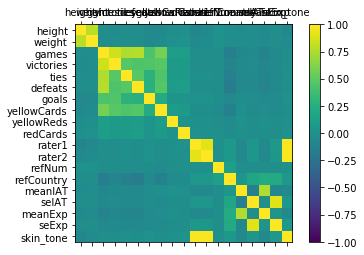

                      redCards  yellowCards  yellowReds
position                                               
Attacking Midfielder  0.007344     0.359580    0.008181
Right Winger          0.012067     0.313157    0.006228
Center Back           0.020085     0.486228    0.017940
Left Fullback         0.013592     0.437834    0.013926
Defensive Midfielder  0.012800     0.580325    0.019416
Goalkeeper            0.012814     0.136768    0.001091
Right Fullback        0.012128     0.519857    0.017479
Left Winger           0.008448     0.359493    0.008004
Left Midfielder       0.011759     0.395296    0.013853
Center Midfielder     0.012223     0.490574    0.014087
Right Midfielder      0.007993     0.406567    0.010801
Center Forward        0.010548     0.305226    0.008257
           redCards  yellowCards  yellowReds
skin_tone                                   
0.000      0.011422     0.388502    0.011454
0.125      0.011112     0.387724    0.011112
0.250      0.013787     0.440830    

In [18]:
#Check for correlations
correlations=soccerdata.corr(method='pearson', min_periods=1)
#print(correlations)
from pandas.plotting import scatter_matrix
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,19,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(soccerdata.columns[soccerdata.dtypes != 'category'])
ax.set_yticklabels(soccerdata.columns[soccerdata.dtypes != 'category'])
plt.show()
#print(soccerdata.columns[soccerdata.dtypes != object])

#Check redcards by position
#print(soccerdata[soccerdata['position']=='Attacking Midfielder'].mean())
#print(soccerdata[soccerdata['position']=='Right Winger'].mean())
#print(soccerdata[soccerdata['position']=='Left Winger'].mean())
#print(soccerdata[soccerdata['position']=='Center Back'].mean())
#print(soccerdata[soccerdata['position']=='Center Forward'].mean())
#print(soccerdata[soccerdata['position']=='Center Midfielder'].mean())
#print(soccerdata[soccerdata['position']=='Right Fullback'].mean())
#print(soccerdata[soccerdata['position']=='Right Midfielder'].mean())
#print(soccerdata[soccerdata['position']=='Left Fullback'].mean())
#print(soccerdata[soccerdata['position']=='Defensive Midfielder'].mean())
#print(soccerdata[soccerdata['position']=='Goalkeeper'].mean())
#print(soccerdata[soccerdata['position']=='Left Midfielder'].mean())

#Using a pivot table
print(pd.pivot_table(soccerdata, values=['yellowCards','yellowReds','redCards'], columns=['position'], aggfunc='mean').transpose())
print(pd.pivot_table(soccerdata, values=['yellowCards','yellowReds','redCards'], columns=['skin_tone'], aggfunc='mean').transpose())
print(pd.pivot_table(soccerdata, values=['yellowCards','yellowReds','redCards'], columns=['club'], aggfunc='mean').transpose())
print(pd.pivot_table(soccerdata, values=['yellowCards','yellowReds','redCards'], columns=['leagueCountry'], aggfunc='mean').transpose())


#Using Seaborn




From the correlations, you can see that the ratings of each player's skin tone are highly correlated, as are the ses of IAT and Exp. The two ratings of skin tone do not appear to be correlated strongly to red cards at the overall aggregated level.

Number of yellow cards and the number of games played with the same referee are correlated, but red cards are much less correlated with number of games played.  Yellow, red, and yellow-red cards are also not strongly correlated.

Clearly, Spain and France get more red cards than England and Germany.  Average redcards per skin tone seems lower for low skin tone scores, but this relationship is not clearly monotonic.  Center backs get more red cards than any other position.

In [4]:
X=soccerdata.drop(['playerShort','rater1','rater2','redCards','club'],axis=1)
#X=soccerdata.drop(['playerShort','rater1','rater2','skin_tone','club'],axis=1)


Y=soccerdata['redCards']
#Y=soccerdata['skin_tone']


print(X.dtypes)

#X=pd.get_dummies(X, columns=["club"])
X1=pd.get_dummies(X, columns=["leagueCountry"])
X1=pd.get_dummies(X1, columns=["position"])
X1['skin_tone']=X['skin_tone']
#X1['redCards']=X['redCards']


print(X1.head())
print(X1.dtypes)

leagueCountry    category
height            float64
weight            float64
position         category
games               int64
victories           int64
ties                int64
defeats             int64
goals               int64
yellowCards         int64
yellowReds          int64
refNum              int64
refCountry          int64
meanIAT           float64
seIAT             float64
meanExp           float64
seExp             float64
skin_tone         float64
dtype: object
   height  weight  games  victories  ties  defeats  goals  yellowCards  \
0   177.0    72.0      1          0     0        1      0            0   
1   179.0    82.0      1          0     0        1      0            1   
5   182.0    71.0      1          0     0        1      0            0   
6   187.0    80.0      1          1     0        0      0            0   
7   180.0    68.0      1          0     0        1      0            0   

   yellowReds  refNum          ...            position_Center Forward  \


In [5]:
#Let's try a linear model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from scipy import stats
enc = OneHotEncoder()


# Split the data into training/testing sets
df_train,df_test,target_train,target_test=train_test_split(X1,Y,test_size=0.2,random_state=123)

#Data mining: Test whether Regression tree is useful
regr = linear_model.LinearRegression()
regr=regr.fit(df_train,target_train)
target_pred = regr.predict(df_test)
full_pred = regr.predict(X1)
print(regr.score(df_test,target_test))

df2_train=sm.add_constant(df_train)
est=sm.OLS(target_train,df2_train)
est2=est.fit()
print(est2.summary())
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(target_test, target_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, target_pred))
#This approach is not that great.

0.015577854640250634
                            OLS Regression Results                            
Dep. Variable:               redCards   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     58.39
Date:                Fri, 02 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:59:48   Log-Likelihood:                 70220.
No. Observations:               92365   AIC:                        -1.404e+05
Df Residuals:                   92335   BIC:                        -1.401e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Definitely non-significant coefficients: height, seIAT, meanExp, seExp

We may be interested in the interaction of position, country, meanIAT, weight, refCountry with skin_tone.  The most efficient way to check this is with a tree-based method, however we could also create interaction columns in the dataset and continue with linear regression.

Mean squared error: 0.01


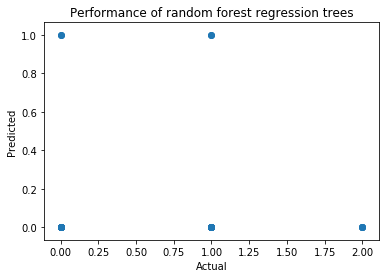

0.9873116230729256


In [16]:
#X=soccerdata.drop(['playerShort','rater1','rater2','redCards','club','height','seIAT','meanExp','seExp'],axis=1)
X=soccerdata.drop(['playerShort','rater1','rater2','redCards','height','seIAT','meanExp','seExp'],axis=1)

X1=pd.get_dummies(X, columns=["leagueCountry"])
X1=pd.get_dummies(X1, columns=["position"])
X1=pd.get_dummies(X1, columns=["club"])
Y=soccerdata['redCards']
# Split the data into training/testing sets
df_train,df_test,target_train,target_test=train_test_split(X1,Y,test_size=0.2,random_state=123)
#regression tree with Random Forest
from sklearn.ensemble import RandomForestClassifier

#Random Forests: Fit many Regression tree models with bootstrapping on sample subsets to avoid overfitting, then let the many models vote on the outcomes
#rf=RandomForestRegressor(n_estimators=20, criterion="mse", max_depth=30, bootstrap=True, random_state=4)
rf=RandomForestClassifier(n_estimators=20,  max_depth=30, bootstrap=True, random_state=4)

#Adjust these parameters to make sense
rf_fitted=rf.fit(df_train,target_train)

pred_redcards_rf=rf_fitted.predict(df_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(pred_redcards_rf,target_test))


#Plot predictions versus actual purchase amounts in test set
plt.figure()
plt.scatter(target_test,pred_redcards_rf) 
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Performance of random forest regression trees")
plt.show()
print(rf.score(df_test,target_test))




Now we need to estimate the importance of each of the variables to the prediction of red cards.

Feature ranking:
1. feature 8 (0.176824)
refNum
2. feature 1 (0.086348)
games
3. feature 0 (0.074365)
weight
4. feature 2 (0.069804)
victories
5. feature 4 (0.065870)
defeats
6. feature 3 (0.057963)
ties
7. feature 6 (0.048584)
yellowCards
8. feature 9 (0.045610)
refCountry
9. feature 11 (0.044768)
skin_tone
10. feature 10 (0.042309)
meanIAT
11. feature 5 (0.042192)
goals
12. feature 17 (0.013584)
position_Center Back
13. feature 20 (0.010685)
position_Defensive Midfielder
14. feature 18 (0.009133)
position_Center Forward
15. feature 21 (0.007534)
position_Goalkeeper
16. feature 25 (0.007013)
position_Right Fullback
17. feature 22 (0.006876)
position_Left Fullback
18. feature 16 (0.005649)
position_Attacking Midfielder
19. feature 23 (0.005461)
position_Left Midfielder
20. feature 27 (0.005083)
position_Right Winger
21. feature 15 (0.004969)
leagueCountry_Spain
22. feature 19 (0.004952)
position_Center Midfielder
23. feature 7 (0.004877)
yellowReds
24. feature 14 (0.004840)
leagueCount

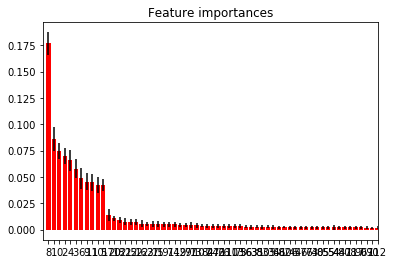

In [17]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(X1.columns[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(list(range(len(indices))), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), indices)
plt.xlim([-1, 60])
plt.show()

It appears that some refs give more red cards than others, and this is the strongest predictor of red cards.  Refs give more red cards to each player the more games they participate in as a dyad, which makes sense.  

Skin tone is the fourth (not including club) or ninth (including club) most important predictor of red cards in the random forest ensemble, which suggests that there is some skin tone bias among referees.  

Also significant is player weight, ref country, and mean ref country IAT.  The center back and defensive midfielder positions appear to predict red cards more so than other positions.

* It should be noted that this method of estimating feature importance is biased toward variables with more variation in the dataset, which might prioritize skin tone as a node splitting variable over league country or club, for example.